In [216]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

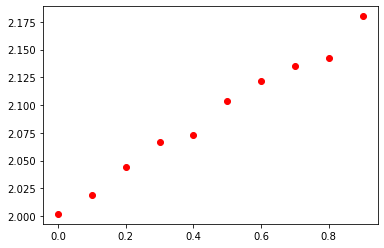

In [217]:
plt.scatter(X, y, c='r')
plt.show()

In [218]:
X_new = X
for i in range (2, 9):
    Xp = X_new**i
    X = np.column_stack((X, Xp))

In [219]:
ones = np.ones(len(X))
X = np.column_stack((ones, X))

In [220]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.0000000e-01, 1.0000000e-02, 1.0000000e-03,
        1.0000000e-04, 1.0000000e-05, 1.0000000e-06, 1.0000000e-07,
        1.0000000e-08],
       [1.0000000e+00, 2.0000000e-01, 4.0000000e-02, 8.0000000e-03,
        1.6000000e-03, 3.2000000e-04, 6.4000000e-05, 1.2800000e-05,
        2.5600000e-06],
       [1.0000000e+00, 3.0000000e-01, 9.0000000e-02, 2.7000000e-02,
        8.1000000e-03, 2.4300000e-03, 7.2900000e-04, 2.1870000e-04,
        6.5610000e-05],
       [1.0000000e+00, 4.0000000e-01, 1.6000000e-01, 6.4000000e-02,
        2.5600000e-02, 1.0240000e-02, 4.0960000e-03, 1.6384000e-03,
        6.5536000e-04],
       [1.0000000e+00, 5.0000000e-01, 2.5000000e-01, 1.2500000e-01,
        6.2500000e-02, 3.1250000e-02, 1.5625000e-02, 7.8125000e-03,
        3.9062500e-03],
       [1.0000000e+00, 6.0000000e-01, 3.

In [221]:
XtXinv = np.linalg.inv(np.dot(X.T, X))
theta_est = np.dot(XtXinv, X.T).dot(y)

In [222]:
theta_est

array([[ 2.00199293e+00],
       [ 2.59427409e-01],
       [-3.83264320e+00],
       [ 4.94215250e+01],
       [-2.62210445e+02],
       [ 6.98312143e+02],
       [-9.86600723e+02],
       [ 7.06150245e+02],
       [-2.01452693e+02]])

In [223]:
def f(x, theta):
    y = theta[0] + theta[1]*(x**1) + theta[2]*(x**2) + theta[3]*(x**3) + theta[4]*(x**4) + theta[5]*(x**5) + theta[6]*(x**6) + theta[7]*(x**7) + theta[8]*(x**8)
    return y

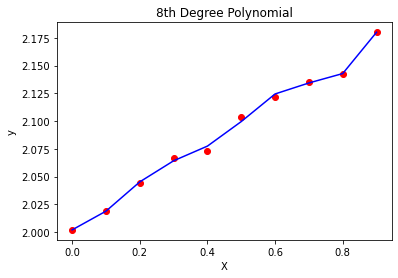

In [224]:
plt.scatter(X_new, y.T, c ='r')
plt.plot(X_new, f(X_new, theta_est), c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.title('8th Degree Polynomial')
plt.show()

theta_ridge for lambda = 0.001 :
[[ 2.00023553]
 [ 0.20335946]
 [ 0.03695112]
 [-0.04099526]
 [-0.06462596]
 [-0.04806859]
 [-0.00556372]
 [ 0.04873106]
 [ 0.10398501]]
theta_lasso for lambda = 0.001 :
[2.00932125 0.17683325 0.         0.         0.         0.
 0.         0.         0.        ]


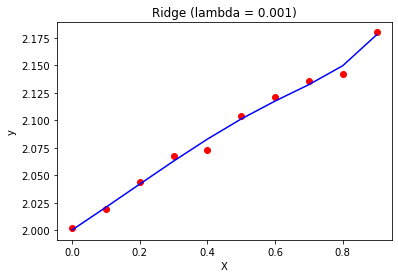

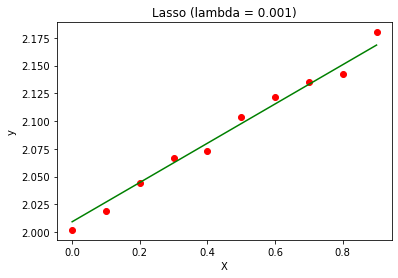

theta_ridge for lambda = 0.01 :
[[ 1.99471461]
 [ 0.21909439]
 [ 0.00406036]
 [-0.03389617]
 [-0.02809453]
 [-0.01125288]
 [ 0.00688224]
 [ 0.02298818]
 [ 0.03599   ]]
theta_lasso for lambda = 0.01 :
[2.05841216 0.06774234 0.         0.         0.         0.
 0.         0.         0.        ]


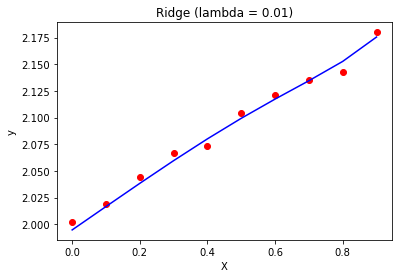

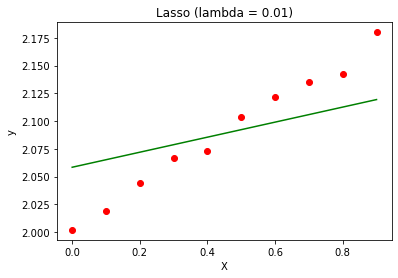

theta_ridge for lambda = 0.1 :
[[ 1.94657363]
 [ 0.27166295]
 [ 0.04077954]
 [-0.01282617]
 [-0.02248477]
 [-0.02009638]
 [-0.0147972 ]
 [-0.00943891]
 [-0.00487436]]
theta_lasso for lambda = 0.1 :
[2.08889622 0.         0.         0.         0.         0.
 0.         0.         0.        ]


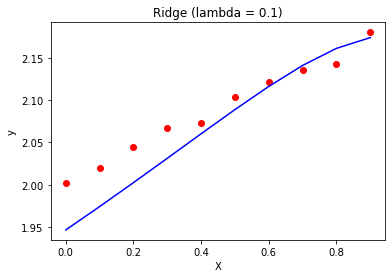

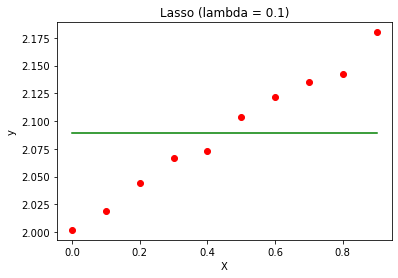

theta_ridge for lambda = 3 :
[[1.36850021]
 [0.43712204]
 [0.2170785 ]
 [0.12550242]
 [0.07942937]
 [0.0533812 ]
 [0.03746093]
 [0.02716978]
 [0.02022846]]
theta_lasso for lambda = 3 :
[2.08889622 0.         0.         0.         0.         0.
 0.         0.         0.        ]


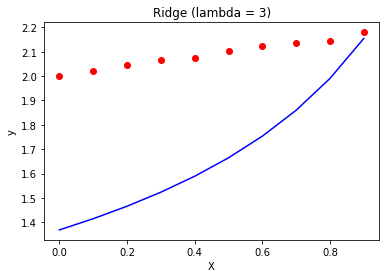

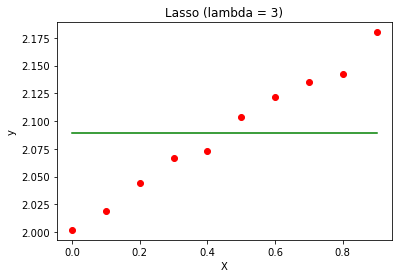

In [226]:
for l in [0.001, 0.01, 0.1, 3]:
    l_I = l * np.eye(np.dot(X.T, X).shape[0])
    theta_ridge = np.dot(np.linalg.inv(np.dot(X.T, X) + l_I), np.dot(X.T, y))
    print(f'theta_ridge for lambda = {l} :\n{theta_ridge}')
    lasso = linear_model.Lasso(l)
    lasso.fit(X[:, 1:], y)
    y_lasso = lasso.predict(X[:, 1:])
    theta_lasso = []
    theta_lasso = np.append(lasso.intercept_, lasso.coef_)
    print(f'theta_lasso for lambda = {l} :\n{theta_lasso}')
    plt.scatter(X_new, y.T, c ='r')
    plt.plot(X_new, f(X_new, theta_ridge), c='b')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Ridge (lambda = {l})')
    plt.show()
    plt.scatter(X_new, y.T, c ='r')
    plt.plot(X_new, f(X_new, theta_lasso), c='g')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Lasso (lambda = {l})')
    plt.show()

We can see that as lambda grows larger, it fits worse and worse. Above lambda 0.1, for Lasso, the line is the same and completely horizontal. For lambda = 0.001 both Lasso and Ridge are good fits for our data.